In [1]:
# This is needed to import the CC and EC Models from this location in this project.
import sys
sys.path.append("../")
sys.path.append("../MagneticFluxRopeModels")

from MagneticFluxRopeModels.ECModel import ECModel
from MagneticFluxRopeModels.MagneticFluxRopeUtils import compute_intermediate_variance_axis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
for delta in [0.7]:
    for psi_deg in [30]:
        simple_ec_model = ECModel(delta=delta, psi=math.radians(psi_deg))
        df = simple_ec_model.simulate_crossing(v_sc=450, y_0=0.3, theta=math.radians(-15), time_stencil=11)
        simple_ec_model.plot_crossing_trajectory(df)


        simple_ec_model.plot_vs_time(df, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"])

NameError: name 'self' is not defined

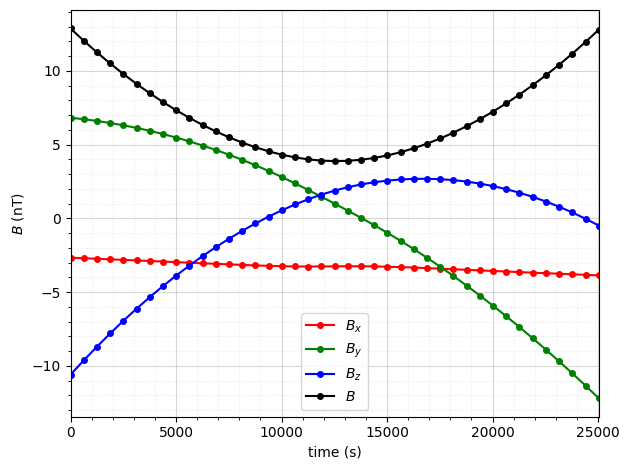

12.876760038450819


In [ ]:
Y_0 = 0.35
DELTA: float = 0.8
PSI_DEG: float = 10.0
THETA_DEG: float = 62
simple_ec_model = ECModel(delta=DELTA, psi=math.radians(PSI_DEG), B_z_0=3.309, tau=0.35)
df = simple_ec_model.simulate_crossing(v_sc=450, y_0=Y_0, theta=math.radians(THETA_DEG), time_stencil=41, noise_type=None, epsilon=0.1)
simple_ec_model.plot_vs_time(df, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"])
print(np.max(df["B"]))

In [ ]:
model_params = {
    "delta": {"mode": "optimised", "initial_value": 0.8, "bounds": [0.5, 1]},
    "psi": {"mode": "optimised", "initial_value": math.radians(45), "bounds": [1e-3, math.radians(180 - 1e-3)]},
    "tau": {"mode": "optimised", "initial_value": 1.4, "bounds": [0.1, 2.0]},
    "C_nm": {"mode": "optimised", "initial_value": 1.4, "bounds": [0.1, 2.0]},
    "B_z_0": {"mode": "optimised", "initial_value": 8.0, "bounds": [1, 20]}
}

crossing_params = {
    "y_0": {"mode": "optimised", "initial_value": 0.0, "bounds": [-0.95, 0.95]},
    "v_sc": {"mode": "fixed", "value": 450.0},
    "theta": {"mode": "optimised", "initial_value": 0, "bounds": [-math.radians(89), math.radians(89)]},
}

fitted_model, optimal_model_parameters, optimal_crossing_parameters, df_fitted, opt_info = ECModel.fit(ECModel, df, model_params, crossing_params)

In [ ]:
optimal_crossing_parameters

{'y_0': np.float64(0.3499969189608635),
 'theta': np.float64(1.0821041938658216),
 'v_sc': 450.0,
 'time_stencil': array([    0.        ,   625.75397007,  1251.50794014,  1877.26191022,
         2503.01588029,  3128.76985036,  3754.52382043,  4380.2777905 ,
         5006.03176058,  5631.78573065,  6257.53970072,  6883.29367079,
         7509.04764086,  8134.80161094,  8760.55558101,  9386.30955108,
        10012.06352115, 10637.81749122, 11263.5714613 , 11889.32543137,
        12515.07940144, 13140.83337151, 13766.58734158, 14392.34131166,
        15018.09528173, 15643.8492518 , 16269.60322187, 16895.35719194,
        17521.11116202, 18146.86513209, 18772.61910216, 19398.37307223,
        20024.1270423 , 20649.88101238, 21275.63498245, 21901.38895252,
        22527.14292259, 23152.89689266, 23778.65086274, 24404.40483281,
        25030.15880288])}

In [ ]:
opt_info

{'grad': array([-0.15783997, -0.06450282,  0.72306265,  0.09042996, -0.061711  ,
        -0.01662028,  0.21429953]),
 'task': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
 'funcalls': 1832,
 'nit': 84,
 'warnflag': 0,
 'x_opt': array([0.80000755, 0.17453901, 0.34999837, 0.99999122, 3.30897618,
        0.34999692, 1.08210419]),
 'f_opt': 1.977020593568714e-06,
 'function_calls': 1832,
 'number_of_iterations': 84,
 'model_parameters_opt': {'delta': np.float64(0.8000075477077431),
  'psi': np.float64(0.17453900726672797),
  'tau': np.float64(0.3499983737989509),
  'C_nm': np.float64(0.9999912212991788),
  'B_z_0': np.float64(3.3089761765474313)},
 'crossing_parameters_opt': {'y_0': np.float64(0.3499969189608635),
  'theta': np.float64(1.0821041938658216)}}

In [ ]:
fitted_model.alpha_n
fitted_model.beta_m

np.float64(0.0025145603158861123)

In [ ]:
optimal_crossing_parameters

{'y_0': np.float64(0.3499969189608635),
 'theta': np.float64(1.0821041938658216),
 'v_sc': 450.0,
 'time_stencil': array([    0.        ,   625.75397007,  1251.50794014,  1877.26191022,
         2503.01588029,  3128.76985036,  3754.52382043,  4380.2777905 ,
         5006.03176058,  5631.78573065,  6257.53970072,  6883.29367079,
         7509.04764086,  8134.80161094,  8760.55558101,  9386.30955108,
        10012.06352115, 10637.81749122, 11263.5714613 , 11889.32543137,
        12515.07940144, 13140.83337151, 13766.58734158, 14392.34131166,
        15018.09528173, 15643.8492518 , 16269.60322187, 16895.35719194,
        17521.11116202, 18146.86513209, 18772.61910216, 19398.37307223,
        20024.1270423 , 20649.88101238, 21275.63498245, 21901.38895252,
        22527.14292259, 23152.89689266, 23778.65086274, 24404.40483281,
        25030.15880288])}

In [ ]:
math.degrees(optimal_crossing_parameters["theta"])

62.0000033019178

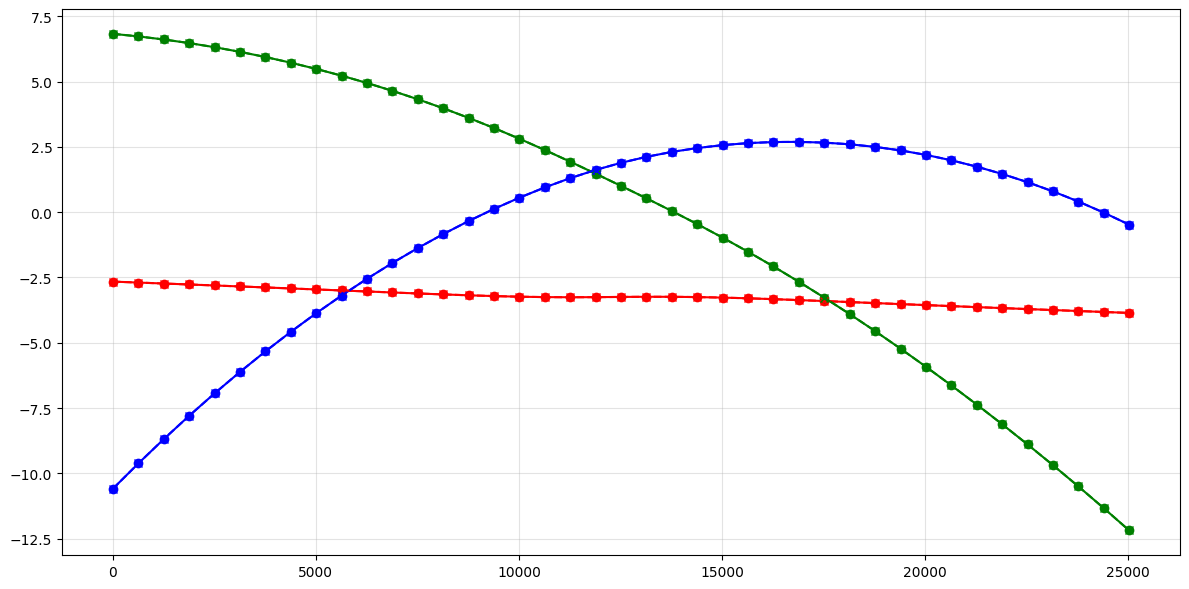

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), tight_layout=True)
ax.plot(df["time"], df["B_x"], "-or")
ax.plot(df["time"], df["B_y"], "-og")
ax.plot(df["time"], df["B_z"], "-ob")
ax.plot(df_fitted["time"], df_fitted["B_x"], "--xr")
ax.plot(df_fitted["time"], df_fitted["B_y"], "--xg")
ax.plot(df_fitted["time"], df_fitted["B_z"], "--xb")
ax.grid(alpha=0.35)


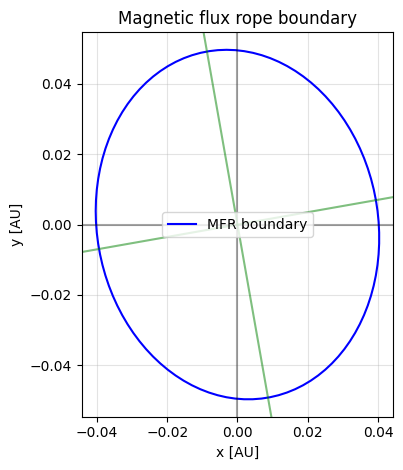

In [ ]:
fitted_model.plot_mfr_boundary()

1


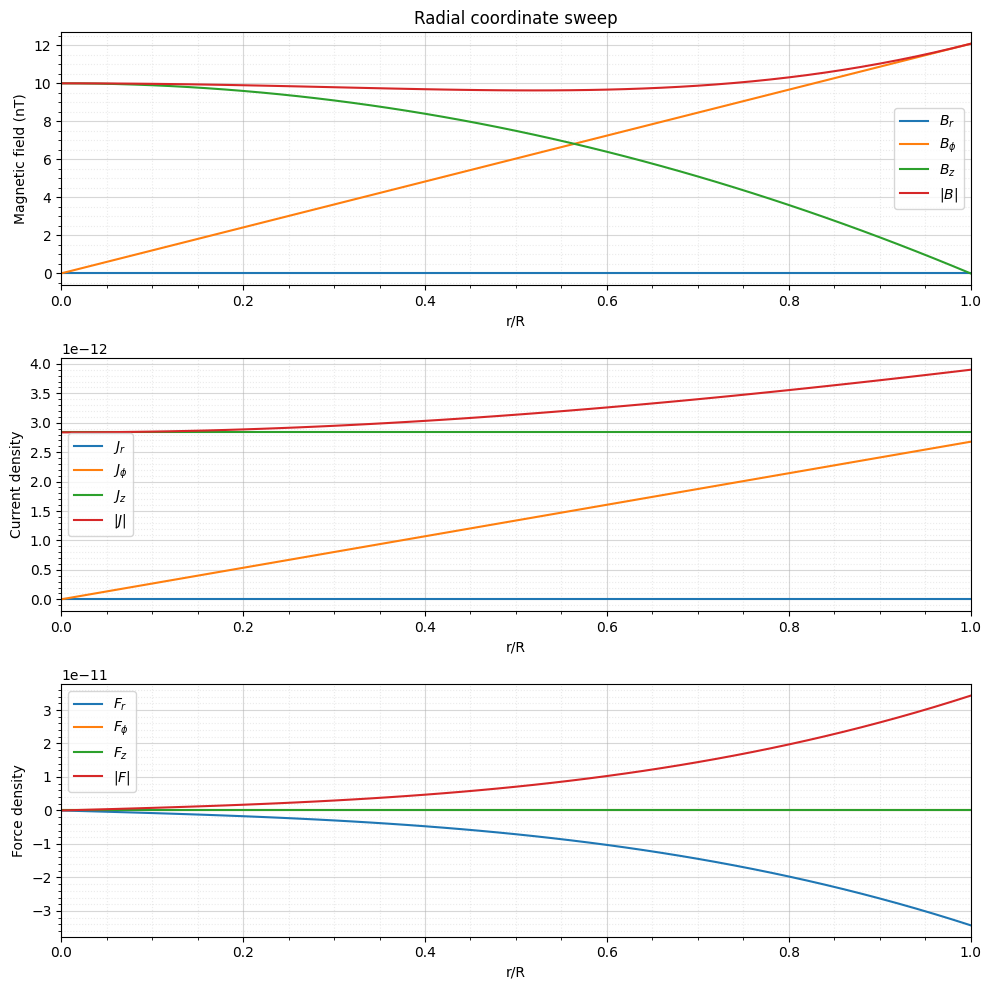

1.5


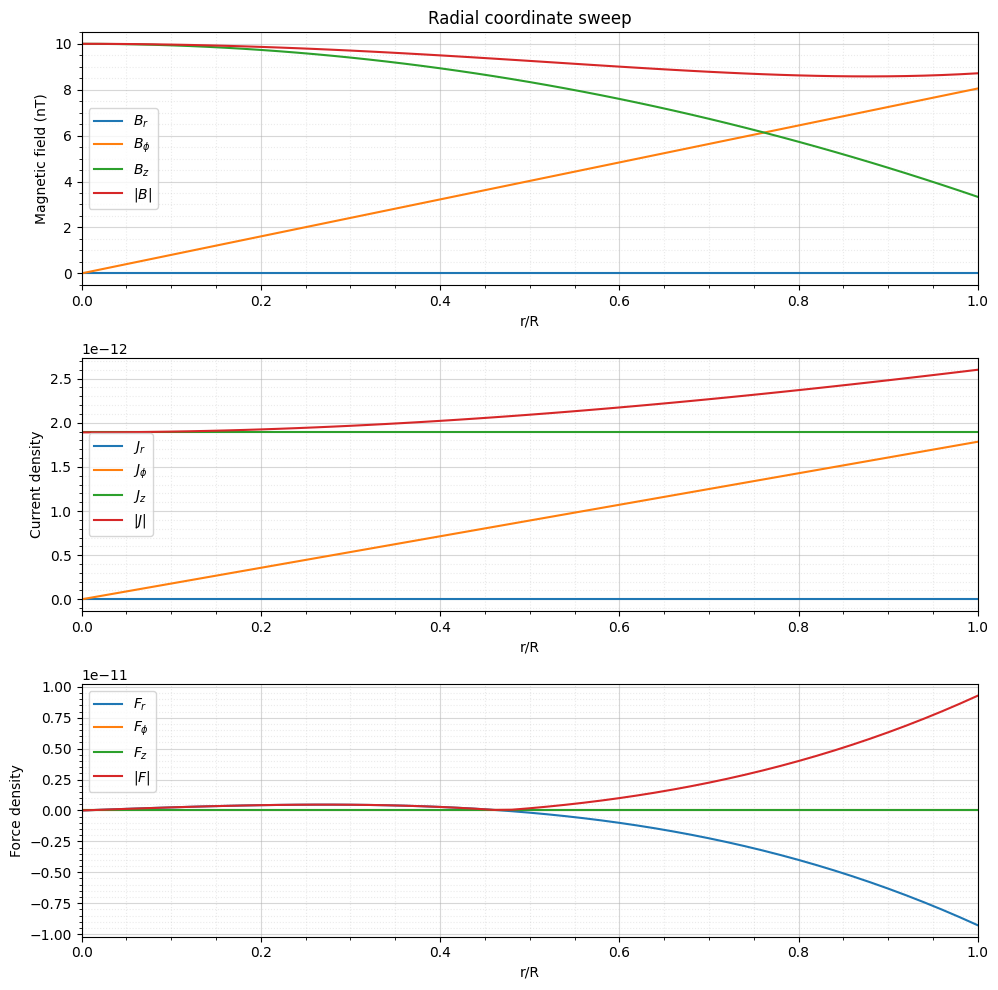

2


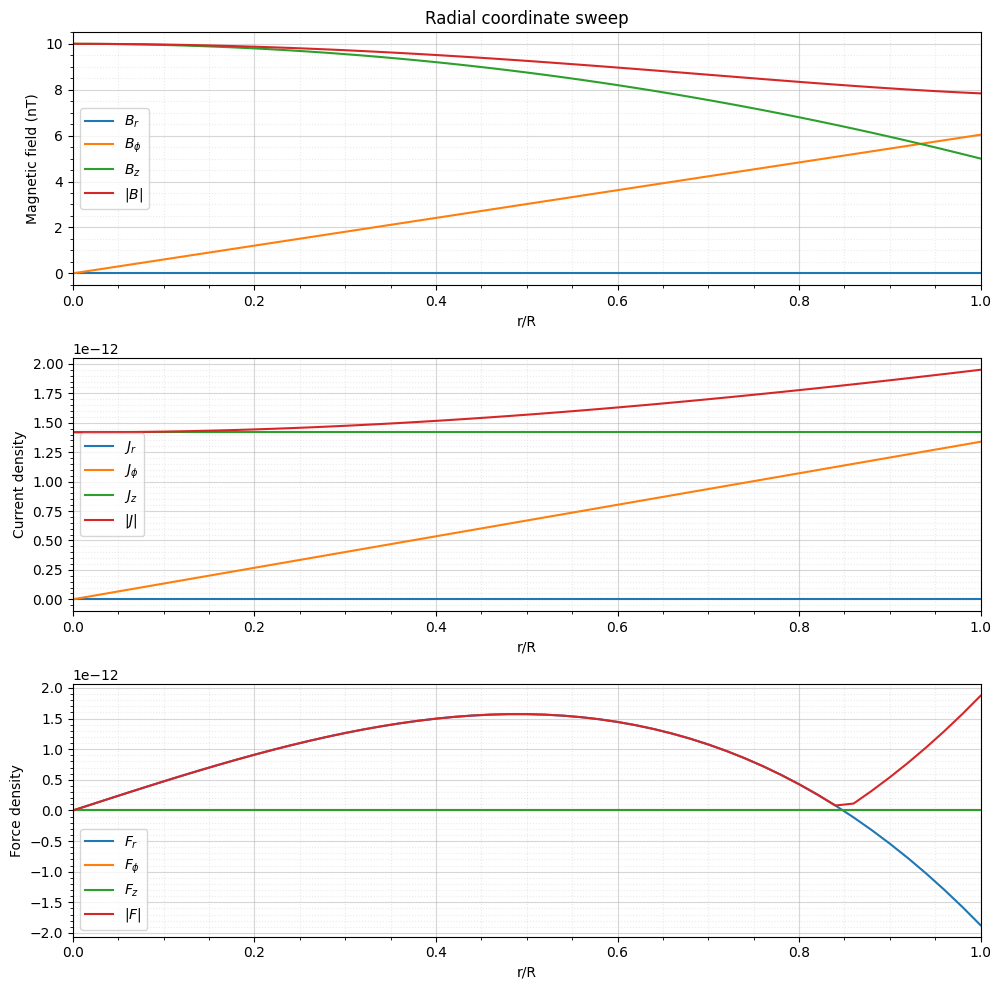

In [ ]:
for tau in [1, 1.5, 2]:
    print(tau)
    ec_model = ECModel(delta=0.75, psi=math.radians(30), tau=tau)
    ec_model.radial_coordinate_sweep(normalise_radial_coordinate=True, plot=True, fig_size=(10, 10))

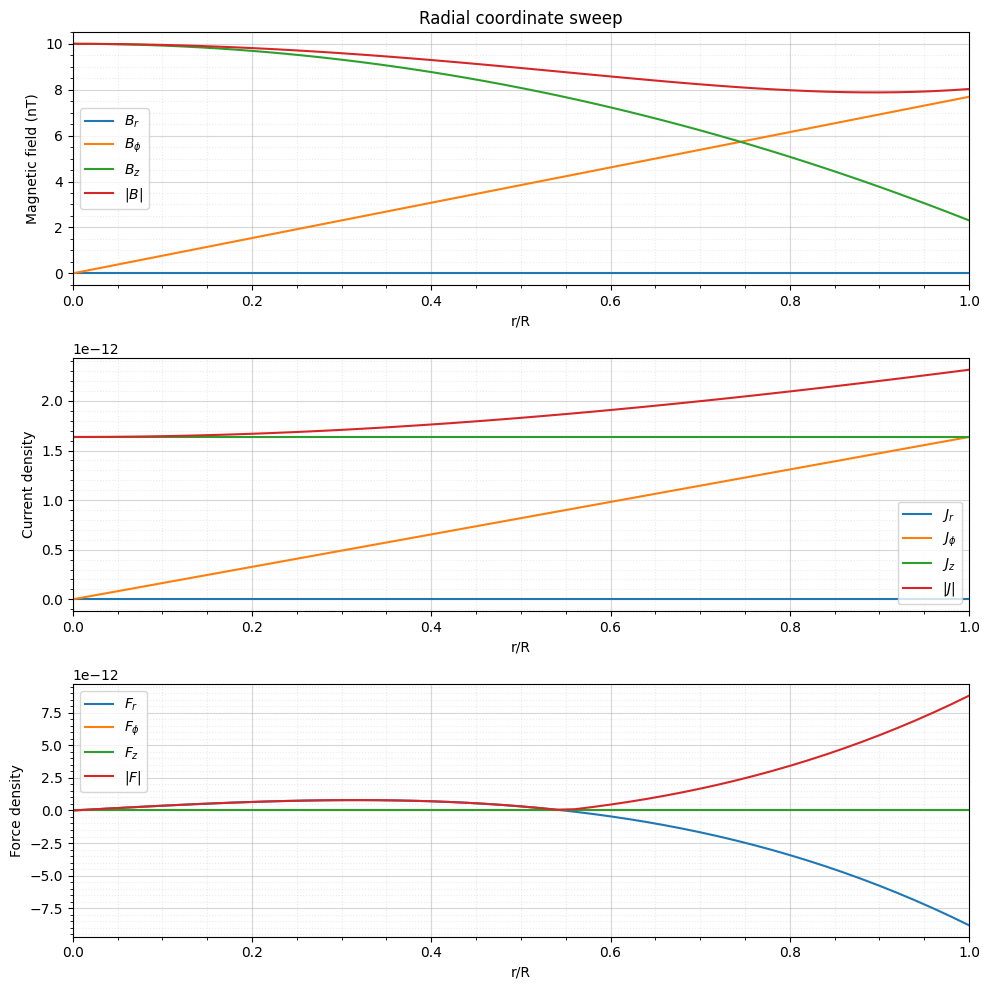

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 array([[ 0.        ,  0.        , 10.        ],
        [ 0.        ,  0.15384615,  9.99692308],
        [ 0.        ,  0.30769231,  9.98769231],
        [ 0.        ,  0.46153846,  9.97230769],
        [ 0.        ,  0.61538462,  9.95076923],
        [ 0.        ,  0.76923077,  9.92307692],
        [ 0.        ,  0.92307692,  9.88923077],
        [ 0.        ,  1.07692308,  9.84923077],
        [ 0.        ,  1.23076923,  9.80307692],
        [ 0.        ,  1.38461538,  9.75076923],
        [ 0.        ,  1.53846154,  9.69230769],
        [ 0.        ,  1.69230769,  9.62769231],
        [ 0.        ,  1.84615385,  9.55692308],
        [ 0.   

In [ ]:
ec_model = ECModel(delta=1.0, psi=0)
ec_model.radial_coordinate_sweep(normalise_radial_coordinate=True, plot=True, fig_size=(10, 10))

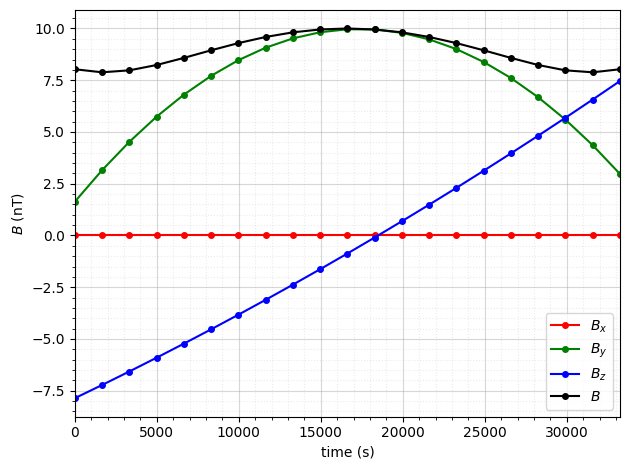

In [ ]:
df = ec_model.simulate_crossing(v_sc=450, y_0=0.0, theta=math.radians(-5), time_stencil=21, noise_type=None, epsilon=0.0)
ec_model.plot_vs_time(df, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"])

In [ ]:
model_params = {
    "delta": {"mode": "fixed", "value": 1.0},
    #"delta": {"mode": "optimised", "initial_value": 0.8, "bounds": [0.2, 1]},
    "psi": {"mode": "fixed", "value": 0},
    # "psi": {"mode": "optimised", "initial_value": math.radians(45), "bounds": [0.01, math.radians(180)*0.99]},
    "tau": {"mode": "optimised", "initial_value": 1.4, "bounds": [0.1, 2.0]},
    #"C_nm": {"mode": "optimised", "initial_value": 1.4, "bounds": [0.15, 3]},
    "B_z_0": {"mode": "optimised", "initial_value": 15.0, "bounds": [0.5, 30]},
    "handedness": {"mode": "fixed", "value": 1},
    }

crossing_params = {
    "y_0": {"mode": "optimised", "initial_value": 0.0, "bounds": [-0.65, 0.65]},
    "v_sc": {"mode": "fixed", "value": 480.0},
    "theta": {"mode": "optimised", "initial_value": math.radians(0), "bounds": [-math.radians(80), math.radians(80)]},
    "time_stencil": {"mode": "fixed", "value": df["time"]},
    }

fitted_model, fitted_model_parameters, fitted_crossing_parameters, df_fitted, info = ECModel.fit(ECModel, df, model_params, crossing_params)


Optimisation did not converge: 2.


In [ ]:
x_opt = info["x_opt"]
f_opt = info["f_opt"]
f_opt

6.195854410137127e-08

In [ ]:
model_parameters_opt = info["model_parameters_opt"]
crossing_parameters_opt = info["crossing_parameters_opt"]
all_opt_param_names = set(model_parameters_opt.keys()) | set(crossing_parameters_opt.keys())
all_opt_param_names

KeyError: 'model_parameters_opt'

In [ ]:
def perturb_error(parameter_name: str, df, model_parameters_opt, crossing_parameters_opt, f_opt: float, epsilon: float = 1e-3):
    if param_name in model_parameters_opt:
        model_parameters_plus = model_parameters_opt.copy()
        model_parameters_plus[parameter_name] += epsilon
        crossing_parameters_plus = crossing_parameters_opt
    else:
        model_parameters_plus = model_parameters_opt
        crossing_parameters_plus = crossing_parameters_opt.copy()
        crossing_parameters_plus[parameter_name] += epsilon
    f_plus, *_ = ECModel.evaluate_model_and_crossing(ECModel, df, "RMSE", model_parameters_plus, crossing_parameters_plus)

    if param_name in model_parameters_opt:
        model_parameters_minus = model_parameters_opt.copy()
        model_parameters_minus[parameter_name] += epsilon
        crossing_parameters_minus = crossing_parameters_opt
    else:
        model_parameters_minus = model_parameters_opt
        crossing_parameters_minus = crossing_parameters_opt.copy()
        crossing_parameters_minus[parameter_name] += epsilon
    f_minus, *_ = ECModel.evaluate_model_and_crossing(ECModel, df, "RMSE", model_parameters_minus, crossing_parameters_minus)

    second_derivative = (f_plus - 2*f_opt + f_minus) / (epsilon)**2
    return second_derivative

epsilon = 1e-5
second_derivatives = dict()
for param_name in all_opt_param_names:
    second_derivative = perturb_error(param_name, df, fitted_model_parameters, fitted_crossing_parameters, epsilon)
    second_derivatives[param_name] = second_derivative
    print(param_name,":", second_derivative)

tau : 9200.207447222521
B_z_0 : 1763.9684534363885
y_0 : 15364.461332144354
theta : 15193.924906164188


In [ ]:
tau_eps = 0.01
err = 0.5*second_derivatives["y_0"]*(tau_eps)**2
err

0.7682230666072177

In [ ]:
param_confidences = dict()
estimated_error = 0.5
for param_name in all_opt_param_names:
    param_confidence = math.sqrt((2*estimated_error) / second_derivatives[param_name])
    param_confidences[param_name] = param_confidence

param_confidences

NameError: name 'all_opt_param_names' is not defined

In [ ]:
math.degrees(fitted_crossing_parameters["theta"])

-5.0000051391421385

In [ ]:
fitted_crossing_parameters["y_0"]

np.float64(-9.402308059246704e-08)

# Create visualisations for the coordinate change

In [36]:
%matplotlib notebook

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from MagneticFluxRopeModels.CCModel import CCModel

cc_model = CCModel(R=1)

def draw_sphere(ax, center=(0, 0, 0), radius=1, color='yellow'):
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color=color, shade=True, alpha=0.8)

def draw_cylinder(ax, start, end, radius=0.5, color='gray', alpha=1.0):
    v = np.array(end) - np.array(start)
    mag = np.linalg.norm(v)
    v = v / mag

    not_v = np.array([1, 0, 0]) if v[0] == 0 else np.array([0, 1, 0])
    n1 = np.cross(v, not_v)
    n1 /= np.linalg.norm(n1)
    n2 = np.cross(v, n1)

    t = np.linspace(0, 2 * np.pi, 100)
    z = np.linspace(0, mag, 100)
    t, z = np.meshgrid(t, z)

    X, Y, Z = [start[i] + v[i] * z + radius * np.cos(t) * n1[i] + radius * np.sin(t) * n2[i] for i in range(3)]
    ax.plot_surface(X, Y, Z, color=color, shade=True, alpha=alpha)

def draw_axes(ax, origin, basis: dict[str, np.ndarray]):
    for i, ((label, vec), c) in enumerate(zip(basis.items(), ["r", "g", "b"])):
        ax.quiver(*origin, vec[0], vec[1], vec[2], color=c, label=label)
        ax.text(origin[0] + vec[0], origin[1] + vec[1], origin[2] + vec[2], label, color=c)

def set_axes_equal(ax):
    """Set 3D plot axes to equal scale."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def draw_angle_arc(ax, A, B, C, radius=1.0, n_points=100, color="orange"):
    # Normalize vectors
    v1 = (B - A) / np.linalg.norm(B - A)
    v2 = (C - A) / np.linalg.norm(C - A)

    # Compute rotation axis
    normal = np.cross(v1, v2)
    if np.linalg.norm(normal) < 1e-8:
        return  # vectors are collinear, no visible angle

    normal = normal / np.linalg.norm(normal)

    # Compute angle between vectors
    angle = np.arccos(np.clip(np.dot(v1, v2), -1, 1))

    # Create arc points
    theta = np.linspace(0, angle, n_points)
    arc_points = np.array([np.cos(t) * v1 + np.sin(t) * np.cross(normal, v1) for t in theta])
    arc_points = A + radius * arc_points

    # Plot the arc
    ax.plot(arc_points[:, 0], arc_points[:, 1], arc_points[:, 2], color=color)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Draw global axes
gse_basis = basis={r"$x^{GSE}$": np.array([1, 0, 0]), r"$y^{GSE}$": np.array([0, 1, 0]), r"$z^{GSE}$": np.array([0, 0, 1])}
draw_axes(ax, origin=np.array([0, 0, 0]), basis=gse_basis)

# Draw the Sun (sphere)
sphere_centre = [5, 0, 0]
sphere_radius = 1
draw_sphere(ax, center=sphere_centre, radius=sphere_radius, color="yellow")
ax.text(sphere_centre[0], sphere_centre[1], sphere_centre[2] + 1.4*sphere_radius, "Sun", color="black", fontsize=12, va="center", ha="center")

# Draw the cylinder and its local axes
local_basis_matrix = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])
gamma = math.radians(-45)
theta = math.radians(0)
rotation_matrix: np.ndarray = cc_model.convert_local_to_gse_coordinates(gamma, theta)
local_basis_matrix_trans = rotation_matrix @ local_basis_matrix

local_basis = {
    r"$x^{local}$": local_basis_matrix_trans[:, 0],
    r"$y^{local}$": local_basis_matrix_trans[:, 2],
    r"$z^{local}$": local_basis_matrix_trans[:, 1]
}

cylinder_centre = np.array([2.5, 0, 0])
draw_axes(ax, origin=cylinder_centre, basis=local_basis)

cylinder_length = 3.0
cylinder_start = cylinder_centre + (cylinder_length/2)*local_basis_matrix_trans[:, 1]
cylinder_end = cylinder_centre - (cylinder_length/2)*local_basis_matrix_trans[:, 1]
cylinder_radius = 0.4
draw_cylinder(ax, start=cylinder_start, end=cylinder_end, radius=cylinder_radius, alpha=0.4)

ax.plot([0, sphere_centre[0] - sphere_radius], [0, 0], [0, 0], color='black', alpha=0.5, linestyle="--")  # Line from Sun to cylinder
ax.scatter(0, 0, 0, color='black', s=100)  # Center of the Sun

draw_angle_arc(ax, A=cylinder_centre, B=cylinder_centre + local_basis_matrix_trans[:, 0], C=sphere_centre, radius=0.8, n_points=21, color="orange")

set_axes_equal(ax)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3D Visualization with Sun, Cylinder, and Local Axes")

# ax.xaxis.pane.set_visible(False)
# ax.yaxis.pane.set_visible(False)
# ax.zaxis.pane.set_visible(False)
# ax.set_axis_off()

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>